In [34]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import cluster


In [35]:
data = pd.read_csv('Preprocessed.csv')

In [36]:
data

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,27,15,20
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,26,12,19
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,1,0,0
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,23,10,14
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,28,14,20
...,...,...,...,...,...,...,...,...,...
2023,18-22,Male,Dhaka University (DU),Other,2,3.00 - 3.39,27,21,18
2024,18-22,Female,Bangladesh Agricultural University (BAU),Engineering - CS,3,3.00 - 3.39,24,18,19
2025,18-22,Male,American International University Bangladesh (...,Engineering - CS,2,2.50 - 2.99,22,13,15
2026,23-26,Female,Dhaka University (DU),Other,3,3.40 - 3.79,26,21,21


In [37]:
data.describe()

,Year,Stress value,Anxiety value,Depression value
count,2028.000000,2028.000000,2028.000000,2028.000000
mean,2.311144,22.234714,12.345168,14.427515
std,1.190877,6.371893,5.493521,6.667830
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,8.000000,9.000000
50%,2.000000,23.000000,13.000000,15.000000
75%,3.000000,26.000000,17.000000,19.000000
max,4.000000,40.000000,21.000000,27.000000


## K-Means

As we can see, Stress, Anxiety and Depression have different ranges so we decided to normalize them to use K-Means.

In [38]:
data['Stress value normalized'] = zscore(data['Stress value'])
data['Anxiety value normalized'] = zscore(data['Anxiety value'])
data['Depression value normalized'] = zscore(data['Depression value'])

We decided to make a cluster analysis between Depression and Anxiety. We use the Elbow Method to find out the number of clusters needed

Text(0, 0.5, 'SSE')

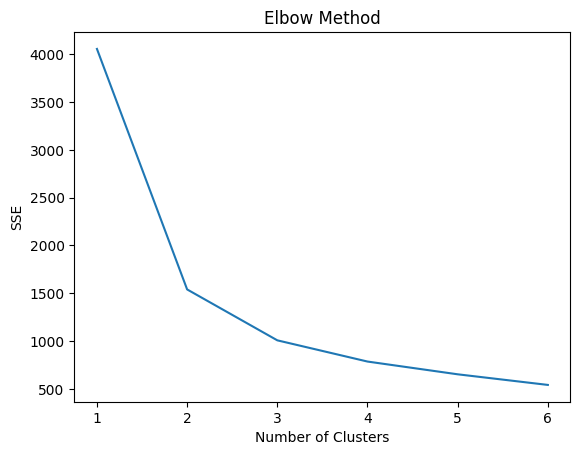

In [39]:
numClusters = [1,2,3,4,5,6]
SSE = []

for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    k_means.fit(data[['Depression value normalized', 'Anxiety value normalized']])
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [40]:
kmeans = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans = kmeans.fit(data[['Depression value', 'Anxiety value']])
kmeans.cluster_centers_

array([[ 7.25443787,  6.53994083],
       [22.13567839, 18.23785595],
       [14.75496689, 12.88344371]])

In [41]:
data['Cluster number'] = kmeans.labels_

In [42]:
data

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value,Stress value normalized,Anxiety value normalized,Depression value normalized,Cluster number
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,27,15,20,0.748045,0.483385,0.835933,1
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,26,12,19,0.591067,-0.062847,0.685922,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,1,0,0,-3.333382,-2.247777,-2.164283,0
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,23,10,14,0.120133,-0.427002,-0.064132,2
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,28,14,20,0.905023,0.301308,0.835933,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,18-22,Male,Dhaka University (DU),Other,2,3.00 - 3.39,27,21,18,0.748045,1.575850,0.535911,1
2024,18-22,Female,Bangladesh Agricultural University (BAU),Engineering - CS,3,3.00 - 3.39,24,18,19,0.277111,1.029618,0.685922,1
2025,18-22,Male,American International University Bangladesh (...,Engineering - CS,2,2.50 - 2.99,22,13,15,-0.036845,0.119230,0.085879,2
2026,23-26,Female,Dhaka University (DU),Other,3,3.40 - 3.79,26,21,21,0.591067,1.575850,0.985944,1


In [ ]:
data[data["Depression value">25 & "Anxiety value"<5]]

TypeError: unsupported operand type(s) for &: 'int' and 'str'

<Axes: xlabel='Depression value', ylabel='Anxiety value'>

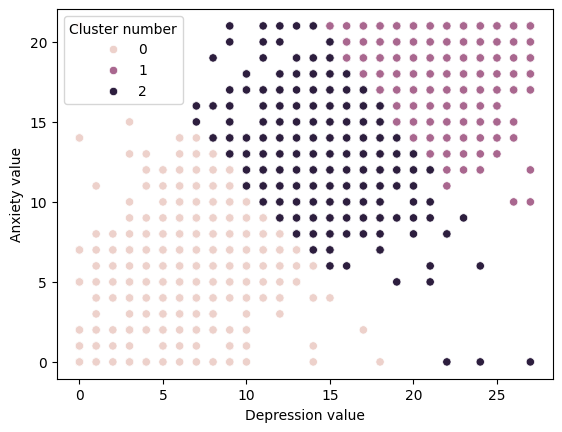

In [43]:
sns.scatterplot(data=data, x='Depression value', y='Anxiety value', hue='Cluster number')

## K-Means++

Now we do the cluster analysis for three dimesions (Depression value, Stress value and Anxiety value)

In [44]:
kmeans_3d = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans_3d = kmeans.fit(data[['Depression value normalized', 'Stress value normalized', 'Anxiety value normalized']])
kmeans_3d.cluster_centers_

array([[-0.38493198, -0.07520552, -0.34067948],
       [ 0.92671446,  0.63895184,  0.92413371],
       [-1.25871333, -1.38435886, -1.3724689 ]])